# Metocean Data Information

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

from icedef import metocean

%matplotlib inline

In [2]:
start_date = np.datetime64('2015-04-20')
end_date = np.datetime64('2015-04-21')

In [3]:
ecmwf_ocean = metocean.Ocean((start_date, end_date))
hycom_ocean = metocean.Ocean((start_date, end_date), model='HYCOM')
narr_atmosphere = metocean.Atmosphere((start_date, end_date))
ecmwf_atmosphere = metocean.Atmosphere((start_date, end_date), model='ECMWF')

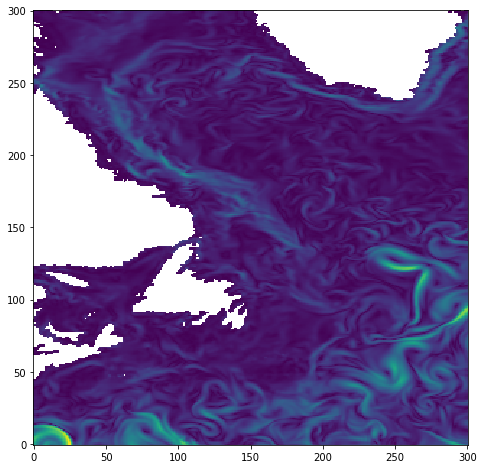

In [4]:
plt.figure(figsize=(10, 8))
plt.imshow(ecmwf_ocean.speeds[0, :, :], origin='lower')
plt.show()

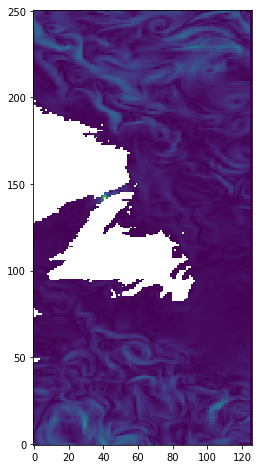

In [5]:
plt.figure(figsize=(10, 8))
plt.imshow(hycom_ocean.speeds[0, :, :], origin='lower')
plt.show()

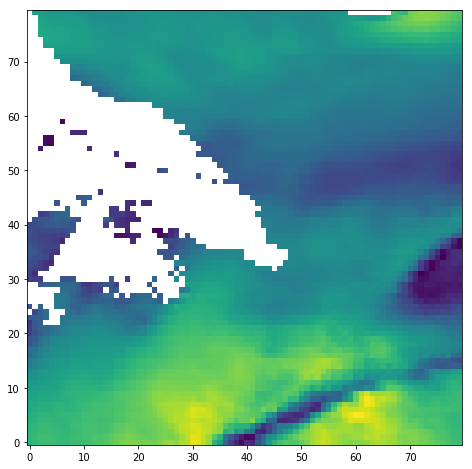

In [6]:
plt.figure(figsize=(10, 8))
plt.imshow(ecmwf_atmosphere.speeds[0, :, :], origin='lower')
plt.show()

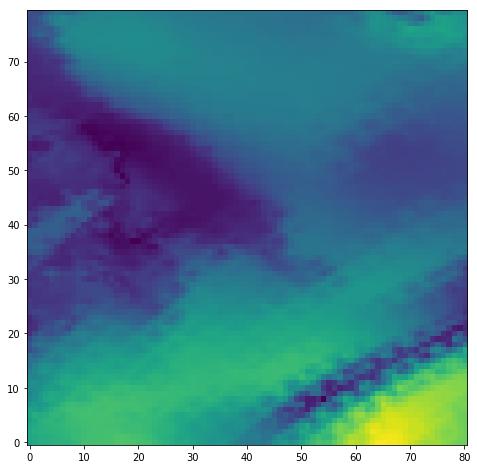

In [7]:
plt.figure(figsize=(10, 8))
plt.imshow(narr_atmosphere.speeds[0, :, :], origin='lower')
plt.show()

In [8]:
import netCDF4 as nc

In [9]:
ds = nc.Dataset('/home/evankielley/Downloads/global-analysis-forecast-phy-001-024_1548970791192.nc')

In [10]:
ds['uo']

<class 'netCDF4._netCDF4.Variable'>
int16 uo(time, depth, latitude, longitude)
    _CoordinateAxes: time depth latitude longitude 
    long_name: Eastward velocity
    standard_name: eastward_sea_water_velocity
    units: m s-1
    unit_long: Meters per second
    _FillValue: -32767
    add_offset: 0.0
    scale_factor: 0.0006103701889514923
    cell_methods: area: mean
unlimited dimensions: 
current shape = (91, 1, 1081, 1081)
filling on

/home/evankielley/anaconda3/envs/icedef/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


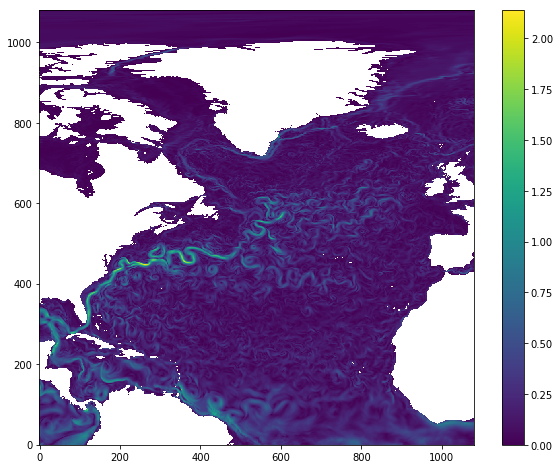

In [11]:
plt.figure(figsize=(10, 8))
plt.imshow(np.sqrt(ds['uo'][0, 0, :, :]**2 + ds['vo'][0, 0, :, :]**2), origin='lower')
#plt.quiver(ds['uo'][0, 0, :, :], ds['vo'][0, 0, :, :])
plt.colorbar()
plt.show()

In [12]:
ds['time']

<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    long_name: Time (hours since 1950-01-01)
    standard_name: time
    calendar: gregorian
    units: hours since 1950-01-01 00:00:00
    axis: T
    _CoordinateAxisType: Time
unlimited dimensions: 
current shape = (91,)
filling on, default _FillValue of 9.969209968386869e+36 used